<a href="https://colab.research.google.com/github/DMittz/SupervisedLearning/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

## Reading Data:

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [4]:
df = df.drop(['CustomerID'], axis = 1)

In [5]:
df.rename(columns = {'Genre': 'Gender'}, inplace = True)

In [6]:
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


Printed the dataframe after its edits. Customer ID removed as it provides unnecessary data and edited spelling error in column heading.

Now, to check if any null values exist:

In [7]:
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Plotting Graphs using Seaborn:

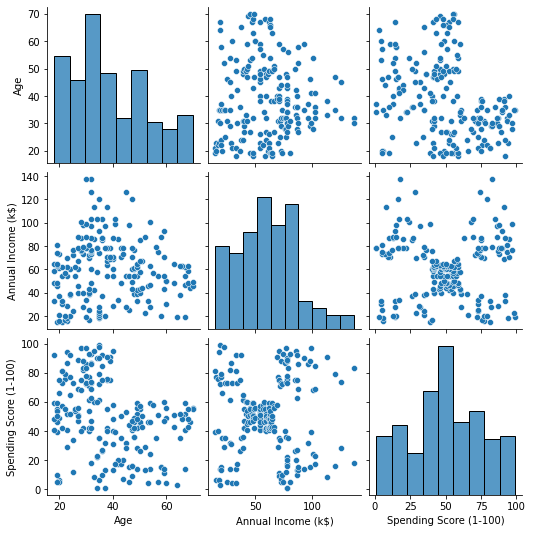

In [9]:
sns.pairplot(data = df)

Exploratory Data Analysis to understand how many clusters their should be for this data. It is visible to the eye that about 5 groups can be formed easily.

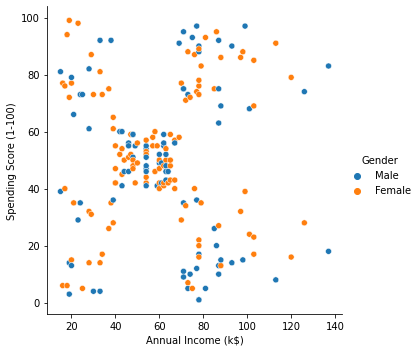

In [10]:
sns.relplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Gender')

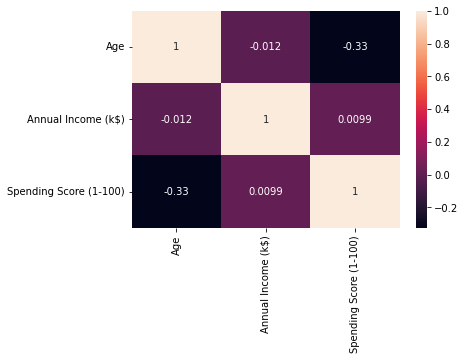

In [11]:
sns.heatmap(df.corr(), annot = True)

## Clustering Customers using KMeans Clustering:

In [12]:
clusters = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  clusters.append(km.inertia_)
  print(km.inertia_)

269981.28
181363.59595959593
106348.37306211122
73679.78903948836
44448.4554479337
37239.835542456036
30241.34361793658
25011.839349156588
21862.092672182895


Printed 'km.inertia' which gives an estimate of the standard deviation in clusters. The point at which the inertia starts to come to a constant is the elbow point

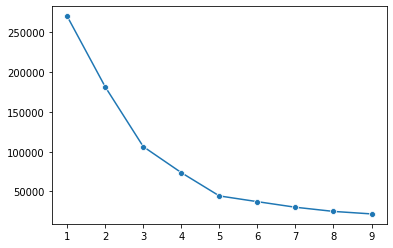

In [13]:
sns.lineplot(x=k_range, y = clusters, marker = 'o')

Plotted graph to find the 'elbow point' of the data. In this case, it is at k = 5

In [21]:
model = KMeans(n_clusters = 5)
prediction = model.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
print(prediction)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


The model has clusters the points into 5 groups and printed the cluster number each data point belongs to

In [29]:
df['clusterID'] = prediction

In [36]:
names = {2: 'Heavy Spenders', 1: 'Cautious Spenders', 3: 'Risky Spenders', 0: 'Moderate Spenders', 4: 'Low Spenders'}

Assigned names/labels to every cluster. Done manually by creating a dictionary to store every value and its corresponding title

In [33]:
def rename_clusters(clusterID):
  return names.get(clusterID)

In [37]:
df['Title'] = df['clusterID'].apply(rename_clusters)

Applied cluster name above.

In [38]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterID,Title
0,Male,19,15,39,4,Low Spenders
1,Male,21,15,81,3,Risky Spenders
2,Female,20,16,6,4,Low Spenders
3,Female,23,16,77,3,Risky Spenders
4,Female,31,17,40,4,Low Spenders


## Visual Representation of the Classified Customers:

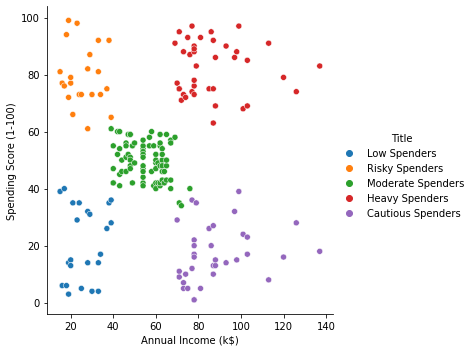

In [39]:
sns.relplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Title')

Above, printed the scatterplot again but this time with the labels that we have assigned.

In [40]:
df1 = df.drop(['clusterID'], axis = 1)

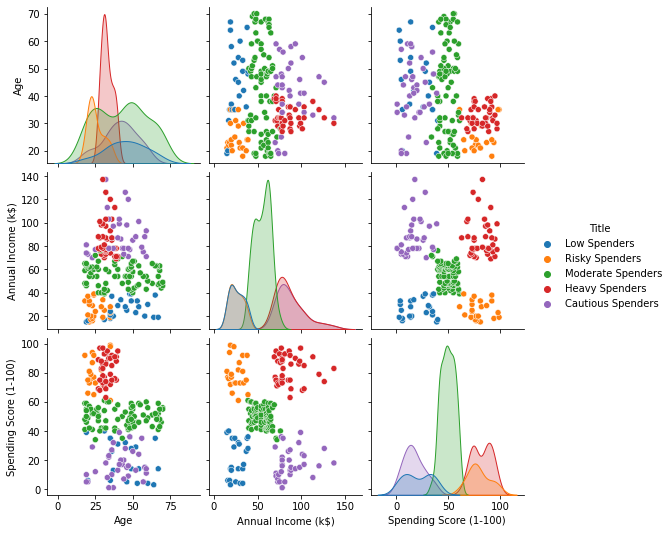

In [41]:
sns.pairplot(data = df1, hue = 'Title')

Above, printed the pairplot showing graphs for all possible combinations with the label included in the form of colour of points.